# Diagonalizing momentum space solutions

In this notebook we use the same 2nd-derivative operator we used for the Schrodinger equation in coordinate space to create a momentum-space matrix version of the S-equation. As in coordinate space, diagonalizing the Hamiltonian matrix will yield its eigenvalues (the energy spectrum) and eigenvectors (wave functions). 

In [1]:
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid"); sns.set_context("talk")

## Define the second-derivative matrix

We'll use the same `second_derivative_matrix` function as before; we won't change $x$ to $p$ in the function because it is just a dummy variable name.
The function returns a matrix that implements an approximate second derivative when applied to a vector made up of a function evaluated at the mesh points (now to be used on a momentum mesh). The numpy `diag` and `ones` functions are used to create matrices with 1's on particular diagonals, as in this $5\times 5$ example: 

$$ \frac{1}{(\Delta p)^2}\,\left( 
    \begin{array}{ccccc}
    -2 & 1 & 0 & 0 & 0 \\
    1 & -2 & 1 & 0 & 0 \\
    0 & 1 & -2 & 1 & 0 \\
    0 & 0 &1 & -2 & 1 \\
    0 & 0 & 0 & 1 & -2
    \end{array}
   \right) 
   \left(\begin{array}{c}
         f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5
         \end{array}
   \right) 
   = %\overset{?}{=}
   \left(\begin{array}{c}
         -2 f_1 + f_2 \\ f_1 - 2f_2 + f_3 \\ f_2 - 2f_3 + f_4 \\ f3 - 2f_4 + f5 \\ f_4 - 2f_5
         \end{array}
   \right) 
 $$  
 

In [2]:
def second_derivative_matrix(N, Delta_x):
    """
    Return an N x N matrix for 2nd derivative of a vector equally spaced by delta_x.
    This can apply to coordinate space, momentum space, or whatever.
    """
    M_temp = np.diag(np.ones(N-1), +1) + np.diag(np.ones(N-1), -1) \
              - 2 * np.diag(np.ones(N), 0)

    return M_temp / (Delta_x**2)

### Define the mesh of $p$ points

In [3]:
N_pts = 801  
p_min = -8.
p_max = 8.
Delta_p = (p_max - p_min) / (N_pts - 1)
p_mesh = np.linspace(p_min, p_max, N_pts)  # create the grid ("mesh") of p points

second_deriv = second_derivative_matrix(N_pts, Delta_p) # make the 2nd derivative matrix

## Harmonic oscillator 

The Hamiltonian matrix in coordinate space is: 

$$
 \hat H \doteq  -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) ,
$$

which has been implemented elsewhere as a sum of matrices. We chose units so that $\hbar^2/2m = 1$ and $\hbar\omega = 1$.

In momentum space the Hamiltonian matrix is:

$$
 \hat H \doteq \frac{p^2}{2m} - \frac{1}{2}\hbar^2 m \omega^2 \frac{d^2}{dp^2}
$$

So these are the same matrices, just with different constants.


In [4]:
# values of constants (choose natural units)
hbar = 1;
mass = 1;
omega = 1;

In [5]:
def KE_p_space_matrix(p_mesh, mass):
    """
    Harmonic oscillator kinetic energy matrix (defined with matrix for derivatives)
    """
    V_diag = p_mesh**2 / (2 * mass)  # diagonal matrix elements
    N = len(p_mesh)  # number of x points
    
    return V_diag * np.diag(np.ones(N), 0) 

In [6]:
# Combine matrices to make the Hamiltonian matrix
PE = - second_deriv * hbar**2 * mass * omega**2 / 2 
Hamiltonian = KE_p_space_matrix(p_mesh, mass) + PE

In [7]:
# Try diagonalizing using numpy functions
eigvals, eigvecs = np.linalg.eigh(Hamiltonian)

In [8]:
print(eigvals[0:10])

[0.4999875  1.4999375  2.49983749 3.49968747 4.49948744 5.49923739
 6.49893733 7.49858723 8.49818711 9.49773696]


In [9]:
# Normalize the wave functions accounting for Delta_p
norm = 1 / np.sqrt(Delta_p)

wf_0 = norm * eigvecs[:,0]
wf_1 = norm * eigvecs[:,1]
wf_2 = norm * eigvecs[:,2]

# Check normalizations
print('norm of n=0 eigenvalue = ', np.trapz(wf_0**2, p_mesh))
print('norm of n=1 eigenvalue = ', np.trapz(wf_1**2, p_mesh))
print('norm of n=2 eigenvalue = ', np.trapz(wf_2**2, p_mesh))

norm of n=0 eigenvalue =  1.0000000000000002
norm of n=1 eigenvalue =  1.0000000000000002
norm of n=2 eigenvalue =  1.0000000000000004


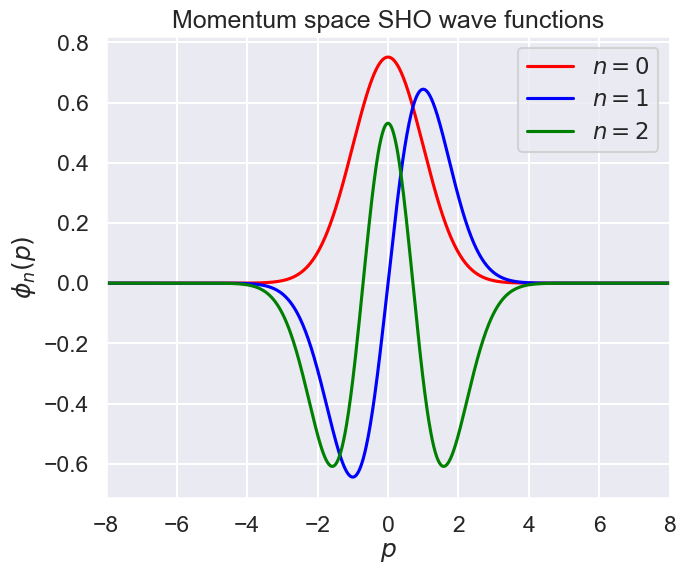

In [10]:
# Plot the normalized wave functions
fig_new = plt.figure(figsize=(16,6))

ax1 = fig_new.add_subplot(1,2,1)
ax1.set_xlabel(r'$p$')
ax1.set_ylabel(r'$\phi_n(p)$')
ax1.set_xlim(-p_max, p_max)
#ax1.set_ylim(-1., 3)

ax1.plot(p_mesh, wf_0, color='red', label=r'$n=0$')
ax1.plot(p_mesh, wf_1, color='blue', label=r'$n=1$')
ax1.plot(p_mesh, wf_2, color='green', label=r'$n=2$')

ax1.set_title('Momentum space SHO wave functions')
ax1.legend();
